In [1]:
#Setup#


from __future__ import division, print_function, unicode_literals

import numpy as np # np is an alias pointing to numpy
import scipy as sp # sp is an alias pointing to scipy
import os

np.random.seed(42)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

plt.rcParams['axes.labelsize'] = 14  # fontsize of the x any y labels
plt.rcParams['xtick.labelsize'] = 12 # fontsize of the tick labels
plt.rcParams['ytick.labelsize'] = 12 # fontsize of the tick labels

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"

def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id)

def save_fig(fig_id, tight_layout=True):
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(image_path(fig_id) + ".png", format='png', dpi=300)
    


DecisionTreeClassifier(random_state=42)

<Figure size 576x432 with 0 Axes>

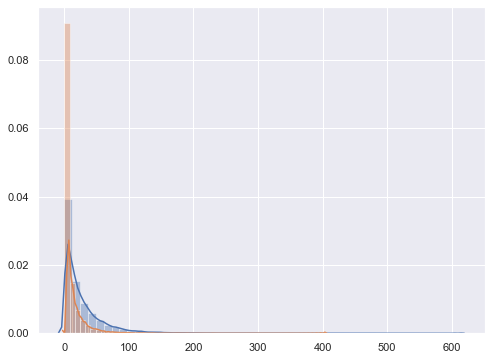

In [40]:
from sklearn.datasets import load_iris # sklearn is a machine learning library for the Python

from sklearn.tree import DecisionTreeClassifier # The sklearn.tree module includes decision tree-based models for 

import seaborn as sns # sns is an alias pointing to seaborn
sns.set(color_codes=True) #Set aesthetic parameters in one step. Remaps the shorthand color codes (e.g. “b”, “g”, “r”, etc.) to the colors from this palette.
from scipy import stats #Documentation stats package of scipy https://docs.scipy.org/doc/scipy/reference/stats.html#module-scipy.stats

#Lets import the necessary packages and the data to start our process#
import numpy as np
import pandas as pd 

data = "HW1_Data.csv"
df = pd.read_csv(data)
######################################### Data Exploration #########################################

#First,we apply the filters to our data (just as we did on RapidMiner)
df= df[df['revenue']>=0]
df= df[df['eqpdays']>=0]

#We then assign our attributes and are target variables to their appropriate columns 
X = df.values[:,:11] # the independent variables 
X
y = df.values[:,11] # the dependent variable 
y


#Then we explore the target variable 
unique, counts = np.unique(y, return_counts=True) # 3 distinct classes equally represented



######################################### Visualizations #########################################
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5 # Estimate x axis limits based on dataset
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5 # Estimate y axis limits based on dataset

plt.figure(2, figsize=(8, 6)) # Set dimensions of new figure and figure id https://matplotlib.org/api/_as_gen/matplotlib.pyplot.figure.html
plt.clf() # Clear the current figure






# Drawing a histogram of attributes and fitting a kernel density estmator
plt.figure(3, figsize=(8, 6))
sns.distplot(df.values[:,1]) # histogram plot 1
sns.distplot(df.values[:,2]) # histogram plot 2




######################################### Model Training #########################################


# The following code trains a DecisionTreeClassifier on the iris dataset
# Decision Tree Induction (Fitting the Model)
# Documentation https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
tree_clf = DecisionTreeClassifier(random_state=42) # Be aware of default parameters
tree_clf.fit(X, y)

In [54]:
attributes = df.columns
attributes = attributes.drop("churndep")
attributes

Index(['revenue', 'outcalls', 'incalls', 'months', 'eqpdays', 'webcap',
       'marryyes', 'travel', 'pcown', 'creditcd', 'retcalls'],
      dtype='object')

In [63]:
df.describe()

,revenue,outcalls,incalls,months,eqpdays,webcap,marryyes,travel,pcown,creditcd,retcalls,churndep
count,31844.000000,31844.000000,31844.000000,31844.000000,31844.000000,31844.000000,31844.000000,31844.000000,31844.000000,31844.000000,31844.000000,31844.000000
mean,58.622173,24.926872,8.052027,18.757097,391.789222,0.894705,0.363177,0.057248,0.184933,0.677113,0.043964,0.497362
std,44.101060,34.747400,16.543853,9.546107,254.746976,0.306937,0.480923,0.232319,0.388249,0.467587,0.224189,0.500001
min,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.440000,3.000000,0.000000,11.000000,212.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,48.335000,13.330000,2.000000,16.000000,341.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,70.970000,33.330000,9.000000,24.000000,530.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,861.110000,610.330000,404.000000,60.000000,1812.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [ ]:
######################################### Imports #########################################

from sklearn.tree import export_graphviz
# If you don't have graphviz package, you need to install it https://anaconda.org/anaconda/graphviz
# How to install Graphviz with Anaconda https://anaconda.org/anaconda/graphviz
# conda install -c anaconda graphviz 

from IPython.display import Image

# ATTENTION: You need to change the working directory
# For instance, when running the script on my local computer, I had to change it to:
os.chdir("/Users/baran/Desktop")

# make the images and decision_trees path in order for image_path to work
if not os.path.exists('./images/decision_trees'):
    os.makedirs('./images/decision_trees')
# You can visualize the trained Decision Tree by first using the export_graphviz()
# method to output a graph definition file called iris_tree.dot

################################# Visualization of Decision Tree ##########################

export_graphviz(
        tree_clf,
        out_file=image_path("churntrees.dot"),
        feature_names= attributes,
        class_names=["1","0"],
        rounded=True,
        filled=True
    )

# Then you can convert this .dot file to a variety of formats such as PDF or PNG using
# the dot command-line tool from the graphviz package.

# change working directory again to where the iris_tree.dot file will be made
# set the working directory to be within the newly created ./images/decision_trees
os.chdir("./images/decision_trees")

#An alternative way to do it in python
import pydot  # run 'pip install pydot' in anaconda prompt from 'https://stackoverflow.com/questions/53773344/importerrorno-module-named-pydot'
(graph,) = pydot.graph_from_dot_file('churntrees.dot')
graph.write_png('churntree.png')

# Note: Graphviz is an open source graph visualization software package, available at http://www.graphviz.org/
# Converting .dot file to PNG Example: Run command "dot -Tpng iris_tree.dot -o iris_tree.png" in the terminal after installing graphviz package 
# and making sure you are in the right directory (same directory as the .dot file)

#print(os.getcwd())
#path_png = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, "iris_tree.png")
Image(filename="churntree.png")

In [ ]:
tree_clf3 = DecisionTreeClassifier(criterion = "entropy", random_state=42,min_samples_split=2, min_impurity_decrease=0.0002,  ) # Be aware of default parameters
tree_clf3.fit(X, y)


######################################### Imports #########################################

from sklearn.tree import export_graphviz
# If you don't have graphviz package, you need to install it https://anaconda.org/anaconda/graphviz
# How to install Graphviz with Anaconda https://anaconda.org/anaconda/graphviz
# conda install -c anaconda graphviz 

from IPython.display import Image

# ATTENTION: You need to change the working directory
# For instance, when running the script on my local computer, I had to change it to:
os.chdir("/Users/baran/Desktop")

# make the images and decision_trees path in order for image_path to work
if not os.path.exists('./images/decision_trees'):
    os.makedirs('./images/decision_trees')
# You can visualize the trained Decision Tree by first using the export_graphviz()
# method to output a graph definition file called iris_tree.dot

################################# Visualization of Decision Tree ##########################

export_graphviz(
        tree_clf,
        out_file=image_path("churntrees3.dot"),
        feature_names= attributes,
        class_names=["1","0"],
        rounded=True,
        filled=True
    )


os.chdir("./images/decision_trees")

#An alternative way to do it in python
import pydot  # run 'pip install pydot' in anaconda prompt from 'https://stackoverflow.com/questions/53773344/importerrorno-module-named-pydot'
(graph,) = pydot.graph_from_dot_file('churntrees3.dot')
graph.write_png('churntree3.png')

# Note: Graphviz is an open source graph visualization software package, available at http://www.graphviz.org/
# Converting .dot file to PNG Example: Run command "dot -Tpng iris_tree.dot -o iris_tree.png" in the terminal after installing graphviz package 
# and making sure you are in the right directory (same directory as the .dot file)

#print(os.getcwd())
#path_png = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, "iris_tree.png")
Image(filename="churntree3.png")

In [ ]:
tree_clf4 = DecisionTreeClassifier(criterion = "entropy", random_state=42,min_samples_split=2, min_impurity_decrease=0.0002, max_depth= 5 ) # Be aware of default parameters
tree_clf4.fit(X, y)


######################################### Imports #########################################

from sklearn.tree import export_graphviz
# If you don't have graphviz package, you need to install it https://anaconda.org/anaconda/graphviz
# How to install Graphviz with Anaconda https://anaconda.org/anaconda/graphviz
# conda install -c anaconda graphviz 

from IPython.display import Image

# ATTENTION: You need to change the working directory
# For instance, when running the script on my local computer, I had to change it to:
os.chdir("/Users/baran/Desktop")

# make the images and decision_trees path in order for image_path to work
if not os.path.exists('./images/decision_trees'):
    os.makedirs('./images/decision_trees')
# You can visualize the trained Decision Tree by first using the export_graphviz()
# method to output a graph definition file called iris_tree.dot

################################# Visualization of Decision Tree ##########################

export_graphviz(
        tree_clf,
        out_file=image_path("churntrees4.dot"),
        feature_names= attributes,
        class_names=["1","0"],
        rounded=True,
        filled=True
    )


os.chdir("./images/decision_trees")

#An alternative way to do it in python
import pydot  # run 'pip install pydot' in anaconda prompt from 'https://stackoverflow.com/questions/53773344/importerrorno-module-named-pydot'
(graph,) = pydot.graph_from_dot_file('churntrees4.dot')
graph.write_png('churntree4.png')

# Note: Graphviz is an open source graph visualization software package, available at http://www.graphviz.org/
# Converting .dot file to PNG Example: Run command "dot -Tpng iris_tree.dot -o iris_tree.png" in the terminal after installing graphviz package 
# and making sure you are in the right directory (same directory as the .dot file)

#print(os.getcwd())
#path_png = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, "iris_tree.png")
Image(filename="churntree4.png")

In [ ]:
tree_clf5 = DecisionTreeClassifier(criterion = "entropy", min_impurity_decrease = 0.01, max_depth= 2, splitter='best') # Be aware of default parameters
tree_clf5.fit(X, y)


######################################### Imports #########################################

from sklearn.tree import export_graphviz
# If you don't have graphviz package, you need to install it https://anaconda.org/anaconda/graphviz
# How to install Graphviz with Anaconda https://anaconda.org/anaconda/graphviz
# conda install -c anaconda graphviz 

from IPython.display import Image

# ATTENTION: You need to change the working directory
# For instance, when running the script on my local computer, I had to change it to:
os.chdir("/Users/baran/Desktop")

# make the images and decision_trees path in order for image_path to work
if not os.path.exists('./images/decision_trees'):
    os.makedirs('./images/decision_trees')
# You can visualize the trained Decision Tree by first using the export_graphviz()
# method to output a graph definition file called iris_tree.dot

################################# Visualization of Decision Tree ##########################

export_graphviz(
        tree_clf,
        out_file=image_path("churntrees5.dot"),
        feature_names= attributes,
        class_names=["1","0"],
        rounded=True,
        filled=True
    )


os.chdir("./images/decision_trees")

#An alternative way to do it in python
import pydot  # run 'pip install pydot' in anaconda prompt from 'https://stackoverflow.com/questions/53773344/importerrorno-module-named-pydot'
(graph,) = pydot.graph_from_dot_file('churntrees5.dot')
graph.write_png('churntree5.png')

# Note: Graphviz is an open source graph visualization software package, available at http://www.graphviz.org/
# Converting .dot file to PNG Example: Run command "dot -Tpng iris_tree.dot -o iris_tree.png" in the terminal after installing graphviz package 
# and making sure you are in the right directory (same directory as the .dot file)

#print(os.getcwd())
#path_png = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, "iris_tree.png")
Image(filename="churntree5.png")

Confusion matrix, without normalization
[[2173 1881]
 [1860 2047]]
Normalized confusion matrix
[[0.54 0.46]
 [0.48 0.52]]


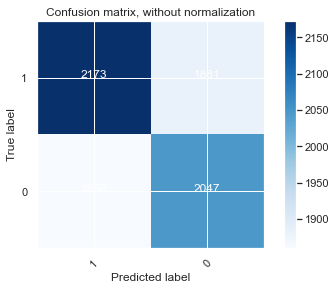

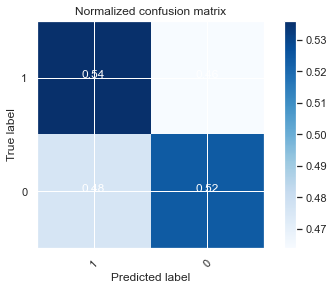

In [75]:
######################################### Imports #########################################
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


###################################### Split the Data ######################################

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
# Note: Always a good idea to shuffle the dataset before you split it into training and testing
# train_test_split performs shuffling by default

############################# Build Model & Apply it to the Test Set #######################

#Build the decision tree
clf3 = tree.DecisionTreeClassifier(random_state=42,min_samples_split=2, min_samples_leaf=1)
# "clf3.fit(X_train, y_train)"" fits the mode and then
# ".predict(X_test)" makes predicitions based on the test set
y_pred = clf3.fit(X_train, y_train).predict(X_test)

###################################### Confusion Matrix #####################################

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Compute confusion matrix to evaluate the accuracy of a classification    
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

    
#cnf_matrix = confusion_matrix(y_test, y_pred)

# Plot non-normalized confusion matrix



plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["1","0"],
                     title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["1","0"], normalize=True,
                     title='Normalized confusion matrix')

plt.show()




                    

Confusion matrix, without normalization
[[1897 2157]
 [1042 2865]]
Normalized confusion matrix
[[0.47 0.53]
 [0.27 0.73]]


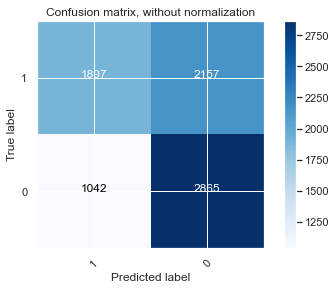

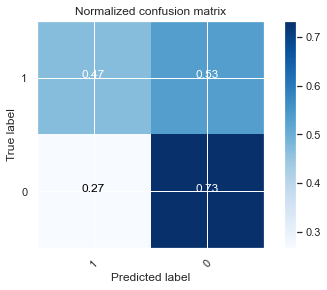

In [76]:
######################################### Imports #########################################
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


###################################### Split the Data ######################################

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
# Note: Always a good idea to shuffle the dataset before you split it into training and testing
# train_test_split performs shuffling by default

############################# Build Model & Apply it to the Test Set #######################

#Build the decision tree
clf3 = tree.DecisionTreeClassifier(criterion = "entropy", random_state=42,min_samples_split=2, min_impurity_decrease=0.0002,  )
# "clf3.fit(X_train, y_train)"" fits the mode and then
# ".predict(X_test)" makes predicitions based on the test set
y_pred = clf3.fit(X_train, y_train).predict(X_test)

###################################### Confusion Matrix #####################################

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Compute confusion matrix to evaluate the accuracy of a classification    
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

    
#cnf_matrix = confusion_matrix(y_test, y_pred)

# Plot non-normalized confusion matrix



plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["1","0"],
                     title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["1","0"], normalize=True,
                     title='Normalized confusion matrix')

plt.show()



Confusion matrix, without normalization
[[1787 2267]
 [ 970 2937]]
Normalized confusion matrix
[[0.44 0.56]
 [0.25 0.75]]


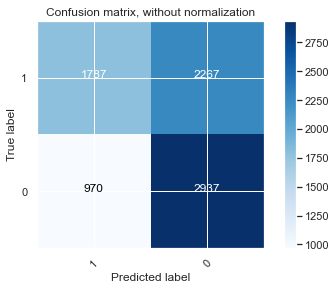

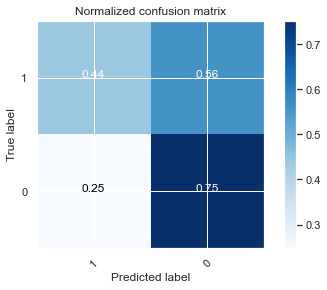

In [77]:
######################################### Imports #########################################
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


###################################### Split the Data ######################################

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
# Note: Always a good idea to shuffle the dataset before you split it into training and testing
# train_test_split performs shuffling by default

############################# Build Model & Apply it to the Test Set #######################

#Build the decision tree
clf3 = tree.DecisionTreeClassifier(criterion = "entropy", random_state=42,min_samples_split=2, min_impurity_decrease=0.0002, max_depth= 5 )
# "clf3.fit(X_train, y_train)"" fits the mode and then
# ".predict(X_test)" makes predicitions based on the test set
y_pred = clf3.fit(X_train, y_train).predict(X_test)

###################################### Confusion Matrix #####################################

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Compute confusion matrix to evaluate the accuracy of a classification    
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

    
#cnf_matrix = confusion_matrix(y_test, y_pred)

# Plot non-normalized confusion matrix



plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["1","0"],
                     title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["1","0"], normalize=True,
                     title='Normalized confusion matrix')

plt.show()



Confusion matrix, without normalization
[[1985 2069]
 [1265 2642]]
Normalized confusion matrix
[[0.49 0.51]
 [0.32 0.68]]


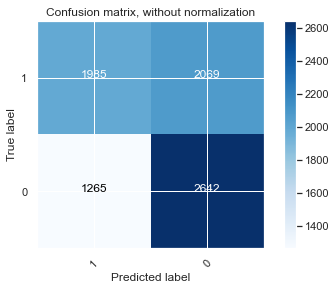

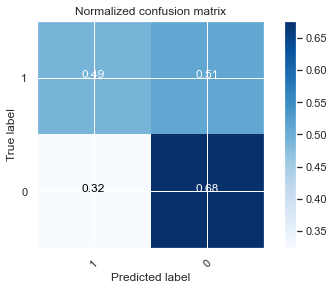

In [78]:
######################################### Imports #########################################
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


###################################### Split the Data ######################################

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
# Note: Always a good idea to shuffle the dataset before you split it into training and testing
# train_test_split performs shuffling by default

############################# Build Model & Apply it to the Test Set #######################

#Build the decision tree
clf3 = tree.DecisionTreeClassifier(criterion = "entropy", min_impurity_decrease = 0.01, max_depth= 2, splitter='best')
# "clf3.fit(X_train, y_train)"" fits the mode and then
# ".predict(X_test)" makes predicitions based on the test set
y_pred = clf3.fit(X_train, y_train).predict(X_test)

###################################### Confusion Matrix #####################################

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Compute confusion matrix to evaluate the accuracy of a classification    
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

    
#cnf_matrix = confusion_matrix(y_test, y_pred)

# Plot non-normalized confusion matrix



plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["1","0"],
                     title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["1","0"], normalize=True,
                     title='Normalized confusion matrix')

plt.show()

